# Overview

# Target of the Project

In [1]:
%matplotlib inline

In [54]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

import mlflow.sklearn

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

import mlflow
from mlflow.models import infer_signature


#  Data Set
- https://www.kaggle.com/datasets/rajkumarpandey02/electric-vehicle-population-data/data


# Workflow To Be Followed

- Step 1: Loading The Dataset
- Step 2: Performing EDA
- Step 3: Feature Engineering
- Step 4: Model Training & Evaluation 

In [3]:
experiment = mlflow.create_experiment(name = "LinearRegression")

In [4]:
run = mlflow.start_run(experiment_id = experiment, run_name="LinerRegression without Pipeline")

## Step 1: Loading The Dataset

In [5]:
# Load the data set
electric_vehicles = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")

In [6]:
#>>> le = LabelEncoder()
#>>> le.fit([1, 2, 2, 6])
le = LabelEncoder()
models = le.fit_transform(electric_vehicles.Model.values)
states = le.fit_transform(electric_vehicles.State)
city = le.fit_transform(electric_vehicles.City)
county = le.fit_transform(electric_vehicles.County)
make = le.fit_transform(electric_vehicles.Make)
cafv = le.fit_transform(electric_vehicles["Clean Alternative Fuel Vehicle (CAFV) Eligibility"])

In [7]:
electric_vehicles.Model = models
electric_vehicles.State = states
electric_vehicles.City = city
electric_vehicles.County = county
electric_vehicles.Make = make
electric_vehicles["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] = cafv

In [8]:
electric_vehicles["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array([0, 1, 2])

In [9]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,155,592,44,98512.0,2019,30,71,Battery Electric Vehicle (BEV),0,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,67,107,44,98236.0,2022,24,69,Battery Electric Vehicle (BEV),1,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,142,533,44,98290.0,2020,30,71,Battery Electric Vehicle (BEV),0,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,73,510,44,98134.0,2020,30,71,Battery Electric Vehicle (BEV),0,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,142,157,44,98020.0,2013,30,72,Battery Electric Vehicle (BEV),0,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,73,648,44,98004.0,2020,30,72,Battery Electric Vehicle (BEV),0,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,73,67,44,98168.0,2021,30,74,Battery Electric Vehicle (BEV),1,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,112,208,44,98335.0,2022,30,72,Battery Electric Vehicle (BEV),1,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
135036,KM8KMDAF3P,53,169,44,98823.0,2023,12,63,Battery Electric Vehicle (BEV),1,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10


In [10]:
electric_vehicles["Electric Vehicle Type"].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            103882
Plug-in Hybrid Electric Vehicle (PHEV)     31156
Name: count, dtype: int64

In [11]:
electric_vehicle_type_mapping = {type:idx for idx, type in enumerate(np.unique(electric_vehicles['Electric Vehicle Type']))}
#electric_vehicles

In [12]:
electric_vehicle_type_01 = electric_vehicles['Electric Vehicle Type'].map(electric_vehicle_type_mapping)

In [13]:
electric_vehicles['Electric Vehicle Type'] = electric_vehicle_type_01

In [14]:
electric_vehicles["Electric Vehicle Type"].value_counts()

Electric Vehicle Type
0    103882
1     31156
Name: count, dtype: int64

In [15]:
#Battery Electric Vehicle (BEV)
#df[(df == 'banana').any(axis=1)]
electric_vehicle_type = electric_vehicles[( electric_vehicles['Electric Vehicle Type'] == 0)]

In [16]:
electric_vehicle_type

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,155,592,44,98512.0,2019,30,71,0,0,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,67,107,44,98236.0,2022,24,69,0,1,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,142,533,44,98290.0,2020,30,71,0,0,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,73,510,44,98134.0,2020,30,71,0,0,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,142,157,44,98020.0,2013,30,72,0,0,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135032,5YJ3E1EC4L,142,157,44,98020.0,2020,30,71,0,0,308.0,0.0,32.0,3315315,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
135033,5YJSA1E29L,73,648,44,98004.0,2020,30,72,0,0,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,73,67,44,98168.0,2021,30,74,0,1,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,112,208,44,98335.0,2022,30,72,0,1,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [17]:
# Plug-in Hybrid Electric Vehicle (PHEV) = 1
plug_in_hybrid_electric_vehicle = electric_vehicles[( electric_vehicles['Electric Vehicle Type'] == 1)]

In [18]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,155,592,44,98512.0,2019,30,71,0,0,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,67,107,44,98236.0,2022,24,69,0,1,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,142,533,44,98290.0,2020,30,71,0,0,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,73,510,44,98134.0,2020,30,71,0,0,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,142,157,44,98020.0,2013,30,72,0,0,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,73,648,44,98004.0,2020,30,72,0,0,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,73,67,44,98168.0,2021,30,74,0,1,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,112,208,44,98335.0,2022,30,72,0,1,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
135036,KM8KMDAF3P,53,169,44,98823.0,2023,12,63,0,1,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10


In [19]:
electric_vehicle_type_index = electric_vehicle_type.columns.get_loc("Electric Range")

In [20]:
electric_vehicle_type.iloc[:, electric_vehicle_type_index] = electric_vehicle_type["Electric Range"].mask(electric_vehicle_type["Electric Range"].eq(0.0), electric_vehicle_type["Electric Range"].mean())

In [21]:
electric_vehicle_type

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,155,592,44,98512.0,2019,30,71,0,0,220.000000,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,67,107,44,98236.0,2022,24,69,0,1,87.780838,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,142,533,44,98290.0,2020,30,71,0,0,266.000000,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,73,510,44,98134.0,2020,30,71,0,0,322.000000,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,142,157,44,98020.0,2013,30,72,0,0,208.000000,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135032,5YJ3E1EC4L,142,157,44,98020.0,2020,30,71,0,0,308.000000,0.0,32.0,3315315,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
135033,5YJSA1E29L,73,648,44,98004.0,2020,30,72,0,0,330.000000,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,73,67,44,98168.0,2021,30,74,0,1,87.780838,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,112,208,44,98335.0,2022,30,72,0,1,87.780838,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [22]:
plug_in_hybrid_electric_vehicle_index = plug_in_hybrid_electric_vehicle.columns.get_loc("Electric Range")

In [23]:
plug_in_hybrid_electric_vehicle.iloc[:, plug_in_hybrid_electric_vehicle_index] = plug_in_hybrid_electric_vehicle["Electric Range"].mask(plug_in_hybrid_electric_vehicle["Electric Range"].eq(0.0), plug_in_hybrid_electric_vehicle["Electric Range"].mean())

In [24]:
#new_electric_vehicles = [electric_vehicle_type, plug_in_hybrid_electric_vehicle]
#new_electric_vehicles.appned(electric_vehicle_type)plug_in_hybrid_electric_vehicle
#new_electric_vehicles.append(plug_in_hybrid_electric_vehicle)

#frames = [df1, df2, df3]
import random
dfs = [electric_vehicle_type, plug_in_hybrid_electric_vehicle]
#random.shuffle(dfs)
electric_vehicles.iloc[:,:] = pd.concat(dfs, axis=0)
electric_vehicles = electric_vehicles.sample(frac=1)

In [25]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
18655,5YJXCBE41J,166,647,44,98903.0,2018,30,73,0,0,238.000000,0.0,14.0,209125255,POINT (-120.47780499999999 46.55350500000003),PACIFICORP,5.307700e+10
16445,1N4AZ0CP6D,25,470,44,98642.0,2013,24,69,0,0,75.000000,0.0,18.0,277427447,POINT (-122.74348499999996 45.81886000000003),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
88295,5YJYGDEEXM,75,31,44,98110.0,2021,30,74,0,1,87.780838,0.0,23.0,138771300,POINT (-122.52357809999995 47.629332300000044),PUGET SOUND ENERGY INC,5.303509e+10
103978,7JRH60FT0P,73,510,44,98102.0,2023,34,102,1,0,41.000000,0.0,43.0,232802461,POINT (-122.32234499999998 47.639830000000075),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
28499,5YJ3E1EA7K,73,274,44,98033.0,2019,30,71,0,0,220.000000,0.0,45.0,229706452,POINT (-122.20263999999997 47.67850000000004),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133100,2C4RC1S76N,142,54,44,98021.0,2022,6,80,1,0,32.000000,0.0,1.0,221553356,POINT (-122.17945799999995 47.80258900000007),PUGET SOUND ENERGY INC,5.306105e+10
62553,5YJ3E1EB4K,73,463,44,98052.0,2019,30,71,0,0,220.000000,0.0,48.0,235402541,POINT (-122.12301999999994 47.67668000000003),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
67671,7SAYGDEE6N,73,265,44,98028.0,2022,30,74,0,1,87.780838,0.0,46.0,182775652,POINT (-122.25047469999998 47.761712800000055),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
120666,2C4RC1N79J,112,599,44,98466.0,2018,6,80,1,0,33.000000,0.0,28.0,301328842,POINT (-122.53166499999998 47.23451000000006),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [26]:
plug_in_hybrid_electric_vehicle["Electric Range"].min()

6.0

In [27]:
plug_in_hybrid_electric_vehicle["Electric Range"].max()

153.0

In [28]:
electric_vehicle_type["Electric Range"].min()

29.0

In [29]:
electric_vehicle_type["Electric Range"].max()

337.0

# Feature Engineering

## Feature Engineering - Electric Range

In [58]:
# Plug-in Hybrid Electric Vehicle (PHEV) = 1
# Battery Electric Vehicle (BEV) = 0
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(columns):
        electric_range = columns['Electric Range']
        electric_vehicle_type = columns['Electric Vehicle Type']
        if electric_range == 0:
            return 0
        elif 0.0 < electric_range < 50 and electric_vehicle_type == 0:
            return 10 #very Short
        elif 50 <= electric_range <= 100 and electric_vehicle_type == 0:
            return 20 #Short
        elif 100 < electric_range <= 300 and electric_vehicle_type == 0:
            return 30 #Medium
        elif 300 < electric_range <= 550 and electric_vehicle_type == 0:
            return 40 #long
        elif 550 < electric_range and electric_vehicle_type == 0:
            return 50 # Extry long
        elif electric_range < 10 and electric_vehicle_type == 1:
            return 1 #very Short
        elif 10 <= electric_range <= 50 and electric_vehicle_type == 1:
            return 2 #Short
        elif 50 < electric_range <= 80 and electric_vehicle_type == 1:
            return 3 #Medium
        elif 80 < electric_range <= 160 and electric_vehicle_type == 1:
            return 4 #long
        elif 160 < electric_range and electric_vehicle_type == 1:
            return 5 # Extry lo
        else:
            return -1.0
        #if electric_range == 0:
        #    return 0.0
        #elif electric_range < 50:
        #    return 1.0 #very Short
        #elif 50 <= electric_range <= 100:
        #    return 3.0 #very Short
        #elif 100 < electric_range <= 300:
        #    return 4.0 #"Medium"
        #elif 300 < electric_range:
        #    return 5.0 #long
        #else:
        #    return -1.0

    df['Electric_Range_Category'] = df.apply(categorize_range, axis=1)
    return df

electric_vehicles = create_electric_range_category(electric_vehicles, column='Electric Range')



C:\Users\GETAC USER\AppData\Local\Temp\ipykernel_6828\1434355711.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electric_Range_Category'] = df.apply(categorize_range, axis=1)


In [38]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range_Category
18655,5YJXCBE41J,166.0,647.0,44.0,98903.0,2018.0,30.0,73.0,0.0,0.0,238.000000,0.0,14.0,209125255.0,POINT (-120.47780499999999 46.55350500000003),PACIFICORP,5.307700e+10,30.0
16445,1N4AZ0CP6D,25.0,470.0,44.0,98642.0,2013.0,24.0,69.0,0.0,0.0,75.000000,0.0,18.0,277427447.0,POINT (-122.74348499999996 45.81886000000003),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10,20.0
88295,5YJYGDEEXM,75.0,31.0,44.0,98110.0,2021.0,30.0,74.0,0.0,1.0,87.780838,0.0,23.0,138771300.0,POINT (-122.52357809999995 47.629332300000044),PUGET SOUND ENERGY INC,5.303509e+10,20.0
103978,7JRH60FT0P,73.0,510.0,44.0,98102.0,2023.0,34.0,102.0,1.0,0.0,41.000000,0.0,43.0,232802461.0,POINT (-122.32234499999998 47.639830000000075),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,2.0
28499,5YJ3E1EA7K,73.0,274.0,44.0,98033.0,2019.0,30.0,71.0,0.0,0.0,220.000000,0.0,45.0,229706452.0,POINT (-122.20263999999997 47.67850000000004),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62553,5YJ3E1EB4K,73.0,463.0,44.0,98052.0,2019.0,30.0,71.0,0.0,0.0,220.000000,0.0,48.0,235402541.0,POINT (-122.12301999999994 47.67668000000003),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,30.0
67671,7SAYGDEE6N,73.0,265.0,44.0,98028.0,2022.0,30.0,74.0,0.0,1.0,87.780838,0.0,46.0,182775652.0,POINT (-122.25047469999998 47.761712800000055),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,20.0
120666,2C4RC1N79J,112.0,599.0,44.0,98466.0,2018.0,6.0,80.0,1.0,0.0,33.000000,0.0,28.0,301328842.0,POINT (-122.53166499999998 47.23451000000006),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,2.0
122839,1FADP5CU2E,112.0,282.0,44.0,98391.0,2014.0,9.0,20.0,1.0,2.0,19.000000,0.0,31.0,152111760.0,POINT (-122.18380499999995 47.18062000000003),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10,2.0


In [39]:
pd.get_dummies(electric_vehicles[["Electric Vehicle Type","Electric_Range_Category"]])

,Electric Vehicle Type,Electric_Range_Category
18655,0.0,30.0
16445,0.0,20.0
88295,0.0,20.0
103978,1.0,2.0
28499,0.0,30.0
...,...,...
62553,0.0,30.0
67671,0.0,20.0
120666,1.0,2.0
122839,1.0,2.0


In [40]:
#electric_vehicles.dropna(subset=["Electric Range"])
electric_vehicles = electric_vehicles[electric_vehicles['Electric Range'].notna()]

In [41]:
electric_vehicles['Electric Range'].isna().sum()

0

In [42]:
col_model_year_index = electric_vehicles.columns.get_loc("Model Year")
electric_vehicles.iloc[:, col_model_year_index] = pd.to_numeric(electric_vehicles['Model Year'], errors="ignore") 

#print(electric_vehicles.dtypes)

#assenger_attributes.drop(columns = ["PassengerId", "Name", "Cabin"])
X = electric_vehicles[['Base MSRP', "Model Year", 'City', 'State', 'County','Make', 'Model', 'Electric Range']]
#X = electric_vehicles.drop(columns = ['Electric Range'])

y = electric_vehicles['Electric_Range_Category']
#scaler = MinMaxScaler()
#y = scaler.fit_transform(electric_vehicles['Electric_Range_Category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=424)

#linear_model = LogisticRegression(C = 1e10)
#model = LogisticRegression(C = 10e9)
#linear_model.fit(X_train, y_train)

#y_pred = linear_model.predict(X_test)

In [43]:
scaler_standard = StandardScaler()


In [44]:
scaler_standard.fit_transform(X_train)

array([[-0.14672981,  1.10916191,  0.78872217, ...,  1.09684261,
         2.1839656 , -0.30439582],
       [-0.14672981,  0.44278001,  1.28697935, ...,  0.90710923,
         1.0229941 , -0.89033733],
       [-0.14672981,  0.77597096, -1.57799945, ...,  0.24304239,
         0.5826256 , -0.30439582],
       ...,
       [-0.14672981,  1.10916191,  0.22299266, ...,  0.1481757 ,
        -2.3398199 , -0.30439582],
       [-0.14672981,  0.10958907, -0.77871189, ...,  0.71737585,
         0.1022236 ,  2.27097558],
       [-0.14672981, -1.55636566, -1.40672355, ...,  0.71737585,
         0.0621901 ,  1.23426972]])

c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


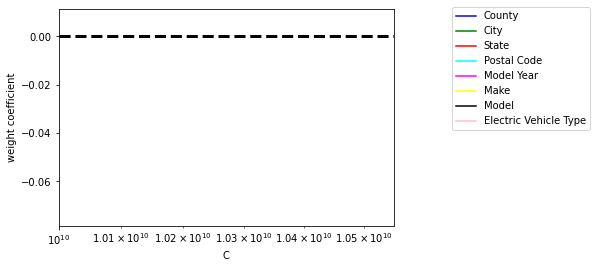

In [46]:
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(1):
    linear_model = LogisticRegression(C = 1e10)
    #linear_model = LogisticRegression(penalty='l1', C=10.**c, random_state=0,  solver='liblinear', max_iter=1000)
    linear_model.fit(X_train, y_train)
    weights.append(linear_model.coef_[1])
    params.append(1e10)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=electric_vehicles.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim(1e10)
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()



In [47]:
y_pred = linear_model.predict(X_test)

In [48]:
linear_model.score(X_train,y_train)

0.8904522613065327

In [49]:
linear_model.score(X_test,y_test)

0.8897857424960506

In [50]:
mlflow.log_artifact("data/Electric_Vehicle_Population_Data.csv")

In [55]:
#Parameters
mlflow.log_param("C", "1e10")
mlflow.log_param("train_test_split", True)
mlflow.log_param("random_state", 424)
mlflow.log_param("test_size", 0.3)
# Log the best parameters
#mlflow.log_param("C", best_params['classifier__C'])
#mlflow.log_param("penalty", best_params['classifier__penalty'])

# Log the model
#mlflow.sklearn.log_model("LogisticRegression", "model")
#mlflow.log_model("LogisticRegression", "model")
#mlflow.log_

 # Infer the model signature
signature = infer_signature(X_test, y_pred)

mlflow.sklearn.log_model(
        sk_model=linear_model,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="LogisticRegression",
    )

# Metics
for train_step in range(100):
    mlflow.log_metric("test_metrics", train_step **2, step = train_step) # accuracy

mlflow.log_metrics({"mse": mean_squared_error(y_test, y_pred)})
mlflow.log_metrics({"Correct classification Rate Training data": linear_model.score(X_train,y_train)})
mlflow.log_metrics({"Correct classification Rate Test data": linear_model.score(X_test,y_test)})


Registered model 'LogisticRegression' already exists. Creating a new version of this model...
Created version '2' of model 'LogisticRegression'.


In [57]:
mlflow.end_run()